In [2]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset('iris')

class kNN:
    def __init__(self, Nnum):
        self.__Nnum = Nnum
        self.__features = pd.DataFrame()
        self.__label = pd.Series()
    def fit(self, features, label): #подаем 2 фичи - матрица с двумя столбцами и массив лейблов
        self.__features = self.__features.append(features)
        self.__label = self.__label.append(label)
        #print(self.__features)
        return
    def predict(self, feature):
        buffer = pd.DataFrame(columns = ['0','1'])
        i = 0
        while i < self.__label.size:
            df2=pd.DataFrame([[((feature[0] - self.__features.iat[i,0])**2+(feature[1] - self.__features.iat[i,1])**2)**0.5, i]], columns=list('01'))
            buffer = buffer.append(df2, ignore_index=True)
            i+=1
        buffer = pd.DataFrame(buffer.sort_values(by='0').to_numpy(), index=buffer.index)
        #print(buffer)
        counter = 0
        dict = {}
        for g in range (0, self.__Nnum):
            if (dict.get(self.__label[buffer.iat[g, 1]]) == None):
                dict[self.__label[buffer.iat[g, 1]]] = 0
            else:
                dict[self.__label[buffer.iat[g, 1]]] += 1
        maxd = -1
        bufkey = ''
        for key in dict:
            if (maxd < dict[key]):
                maxd = dict[key]
                bufkey = key
        self.__label = self.__label.append(pd.Series([bufkey]), ignore_index=True)
        df = pd.DataFrame([[feature[0], feature[1]]], columns=[self.__features.columns[0], self.__features.columns[1]])
        self.__features = self.__features.append(df, ignore_index=True)
        print(bufkey)
        return
    def visualise(self):
        vis = pd.DataFrame(columns=[self.__features.columns[0], self.__features.columns[1], 'species'])
        for t in range (0, self.__label.size):
            df = pd.DataFrame([[self.__features.iat[t,0], self.__features.iat[t,1], self.__label[t]]],columns=[self.__features.columns[0], self.__features.columns[1], 'species'])
            vis = vis.append(df, ignore_index=True)
        sns.pairplot(vis, hue='species')
        return
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<ipython-input-2-f02cfcb60cdd>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__label = pd.Series()


setosa
setosa


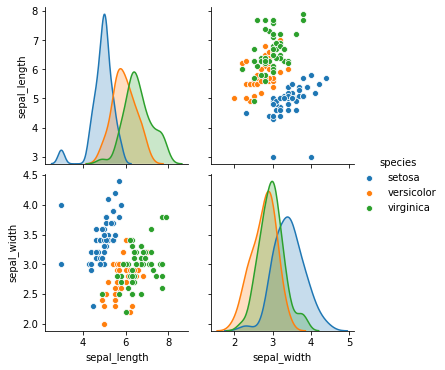

In [5]:
copy = iris
copy=copy.drop(['species', 'petal_length', 'petal_width'], axis=1)
copy1 = iris['species']
clf = kNN(11)
clf.fit(copy, copy1)
a = pd.Series([3,3])
clf.predict(a)
b = pd.Series([3,4])
clf.predict(b)
clf.visualise()

In [229]:
#buffer3 = pd.DataFrame(copy.sort_values(0).to_numpy(), index=copy.index)
buffer = pd.DataFrame(columns = ['0','1'])
print(buffer.columns[0])
df2=pd.DataFrame([[1,1],[-1,2]], columns=list('01'))
buffer = buffer.append(df2, ignore_index=True)
buffer
#buffer = pd.DataFrame(buffer.sort_values(by='0').to_numpy(), index=buffer.index)


0


,0,1
0,1,1
1,-1,2


In [218]:
df2=pd.DataFrame([[1,1],[-1,2]])
a = pd.Series([1,2])
print(a)
print(df2)
e = a.to_frame()
df2 = df2.merge(e, how='left')
p

0    1
1    2
dtype: int64
   0  1
0  1  1
1 -1  2


,0,1
0,1,1
1,-1,2
